In [1]:
# Filename: stock_price_prediction.py

import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error


In [1]:
# Function to preprocess the data
def preprocess_data(stock_data, time_step=60):
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data_scaled = scaler.fit_transform(stock_data)

    # Create the dataset with the specified time window
    X, y = [], []
    for i in range(time_step, len(stock_data_scaled)):
        X.append(stock_data_scaled[i - time_step:i, 0])  # The past `time_step` data points
        y.append(stock_data_scaled[i, 0])  # The next day's stock price

    # Convert lists to NumPy arrays
    X, y = np.array(X), np.array(y)

    # Reshape X to be [samples, time steps, features] for LSTM
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Return the processed X, y, and scaler for future inverse transformation
    return X, y, scaler

In [3]:
# Build LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer for stock price prediction
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [4]:

# Train the model and predict
def train_and_predict_for_company(ticker):
    print(f"Fetching data for {ticker}...")

In [5]:
# Fetch stock data using yfinance
stock_data = yf.download('AAPL', start='2024-01-01', end='2024-09-01')



# Only use 'Close' prices from the stock data
stock_data = stock_data[['Close']]

# Display the first few rows to verify the data
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                 Close
Date                  
2024-01-02  185.639999
2024-01-03  184.250000
2024-01-04  181.910004
2024-01-05  181.179993
2024-01-08  185.559998
...                ...
2024-08-26  227.179993
2024-08-27  228.029999
2024-08-28  226.490005
2024-08-29  229.789993
2024-08-30  229.000000

[168 rows x 1 columns]


In [6]:
# Fetch stock data using yfinance
stock_data = yf.download('MSFT', start='2024-01-01', end='2024-09-01')
# Only use 'Close' prices from the stock data
stock_data = stock_data[['Close']]

# Display the first few rows to verify the data
print(stock_data)

[*********************100%***********************]  1 of 1 completed

                 Close
Date                  
2024-01-02  370.869995
2024-01-03  370.600006
2024-01-04  367.940002
2024-01-05  367.750000
2024-01-08  374.690002
...                ...
2024-08-26  413.489990
2024-08-27  413.839996
2024-08-28  410.600006
2024-08-29  413.119995
2024-08-30  417.140015

[168 rows x 1 columns]


In [7]:
# Fetch stock data using yfinance
stock_data = yf.download('GOOGL', start='2024-01-01', end='2024-09-01')
# Only use 'Close' prices from the stock data
stock_data = stock_data[['Close']]

# Display the first few rows to verify the data
print(stock_data)


[*********************100%***********************]  1 of 1 completed

                 Close
Date                  
2024-01-02  138.169998
2024-01-03  138.919998
2024-01-04  136.389999
2024-01-05  135.729996
2024-01-08  138.839996
...                ...
2024-08-26  166.160004
2024-08-27  164.679993
2024-08-28  162.850006
2024-08-29  161.779999
2024-08-30  163.380005

[168 rows x 1 columns]


In [8]:
# Fetch stock data using yfinance
stock_data = yf.download('NVDA', start='2024-01-01', end='2024-09-01')
# Only use 'Close' prices from the stock data
stock_data = stock_data[['Close']]

# Display the first few rows to verify the data
print(stock_data)


[*********************100%***********************]  1 of 1 completed

                 Close
Date                  
2024-01-02   48.167999
2024-01-03   47.569000
2024-01-04   47.998001
2024-01-05   49.097000
2024-01-08   52.252998
...                ...
2024-08-26  126.459999
2024-08-27  128.300003
2024-08-28  125.610001
2024-08-29  117.589996
2024-08-30  119.370003

[168 rows x 1 columns]


In [9]:
# Split data into training and testing (80% training, 20% testing)
training_data_len = int(len(stock_data) * 0.8)
training_data = stock_data[:training_data_len]
testing_data = stock_data[training_data_len:]
    

In [10]:
  # Preprocess training data
time_step = 60
X_train, y_train, scaler = preprocess_data(training_data, time_step)


In [11]:
# Build the LSTM model
model = build_lstm_model((X_train.shape[1], 1))
    

c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3560
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1823
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0372
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0471
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0321
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0129
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0246
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0240
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0219
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0172
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0151
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0171
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0138
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0108
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0133
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━

In [13]:
# Preprocess test data
total_data = pd.concat((training_data, testing_data), axis=0)
test_inputs = total_data[len(total_data) - len(testing_data) - time_step:].values
test_inputs_scaled = scaler.transform(test_inputs)
    
X_test = []
for i in range(time_step, len(test_inputs_scaled)):
        X_test.append(test_inputs_scaled[i-time_step:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [14]:
# Predict the stock prices
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step


In [15]:
# Get actual stock prices for comparison
actual_stock_prices = testing_data['Close'].values

In [2]:
def train_and_predict_for_company(company):
    # After training and predicting, plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(actual_stock_prices, color='blue', label='Actual Stock Price')
    plt.plot(predicted_stock_prices, color='red', label='Predicted Stock Price')
    plt.title(f'{company} Stock Price Prediction')  # Corrected to 'company'
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

In [17]:
def plot_stock_predictions(actual_stock_prices, predicted_stock_prices, company):
    """
    Function to plot the actual vs. predicted stock prices.
    
    Parameters:
    - actual_stock_prices: The actual stock prices from the test data.
    - predicted_stock_prices: The predicted stock prices by the model.
    - company: The ticker symbol of the company (used for the plot title).
    """
    # Create a new figure with a specific size
    plt.figure(figsize=(10, 6))

    # Plot the actual stock prices in blue
    plt.plot(actual_stock_prices, color='blue', label='Actual Stock Price')

    # Plot the predicted stock prices in red
    plt.plot(predicted_stock_prices, color='red', label='Predicted Stock Price')

    # Set the title of the plot
    plt.title(f'{company} Stock Price Prediction')

    # Set the labels for the x and y axes
    plt.xlabel('Time')
    plt.ylabel('Stock Price')

    # Add a legend to differentiate between actual and predicted prices
    plt.legend()

    # Show the plot
    plt.show()



In [18]:
def train_and_predict_for_company(company):
    # After training and predicting
    plot_stock_predictions(actual_stock_prices, predicted_stock_prices, company)

Returned Values:

X_train: The training input data. It's an array where each entry is a sequence of 60 days of stock prices.
y_train: The target output data. It's an array where each entry is the stock price on the day immediately following the 60-day window in X_train.

In [19]:
# Train the model and predict for a given company
def train_and_predict_for_company(company):
    print(f"Fetching data for {company}...")

    # Fetch stock data using yfinance
    stock_data = yf.download(company, start='2024-01-01', end='2024-09-01')
    stock_data = stock_data[['Close']]  # Only use 'Close' prices

    # Split data into training and testing (80% training, 20% testing)
    training_data_len = int(len(stock_data) * 0.8)
    training_data = stock_data[:training_data_len]
    testing_data = stock_data[training_data_len:]

    # Preprocess training data
    time_step = 60
    X_train, y_train, scaler = preprocess_data(training_data, time_step)

    # Build the LSTM model
    model = build_lstm_model((X_train.shape[1], 1))

    # Train the model
    model.fit(X_train, y_train, epochs=20, batch_size=32)

    # Preprocess test data
    total_data = pd.concat((training_data, testing_data), axis=0)
    test_inputs = total_data[len(total_data) - len(testing_data) - time_step:].values
    test_inputs_scaled = scaler.transform(test_inputs)

    X_test = []
    for i in range(time_step, len(test_inputs_scaled)):
        X_test.append(test_inputs_scaled[i - time_step:i, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Predict the stock prices
    predicted_stock_prices = model.predict(X_test)
    predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)

    # Get actual stock prices for comparison
    actual_stock_prices = testing_data['Close'].values

    # Plot the results
    plot_stock_predictions(actual_stock_prices, predicted_stock_prices, company)


[*********************100%***********************]  1 of 1 completed

Training and predicting for AAPL...
Fetching data for AAPL...
Epoch 1/20



c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.2209
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1257
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0478
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0264
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0314
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0127
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0187
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0233
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0164
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0087
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0108
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0121
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0139
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0090
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0117
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/

c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step


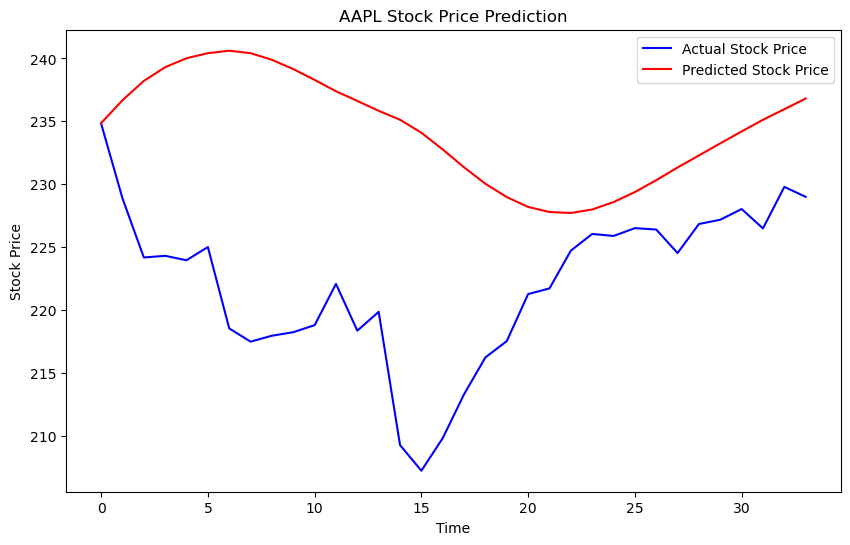

[*********************100%***********************]  1 of 1 completed

Training and predicting for MSFT...
Fetching data for MSFT...
Epoch 1/20



c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.3585
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1451
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0297
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0394
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0367
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0207
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0269
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0239
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0228
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0210
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0241
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0175
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0184
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0189
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/

c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000299825F4A60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 405ms/step


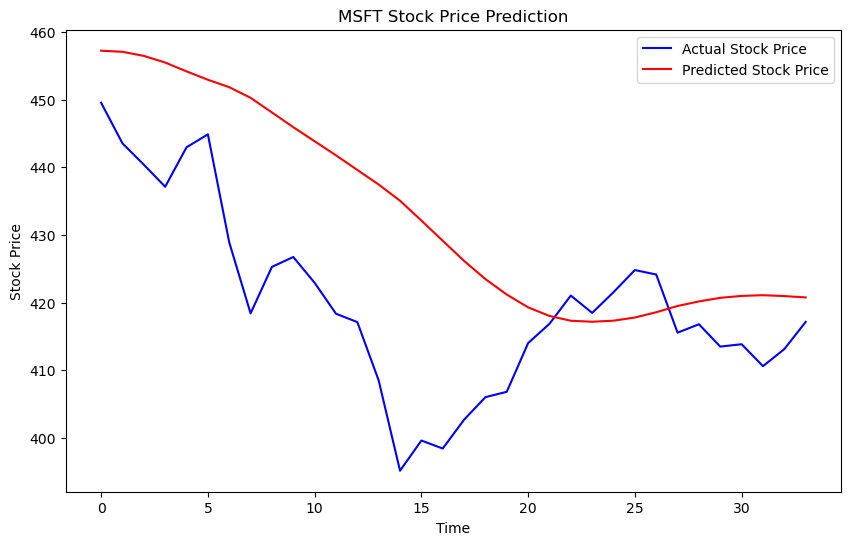

[*********************100%***********************]  1 of 1 completed

Training and predicting for GOOGL...
Fetching data for GOOGL...
Epoch 1/20



c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.4071
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1439
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0178
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0534
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0216
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0095
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0197
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0209
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0133
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0087
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0101
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0131
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0090
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0106
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/

c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 317ms/step


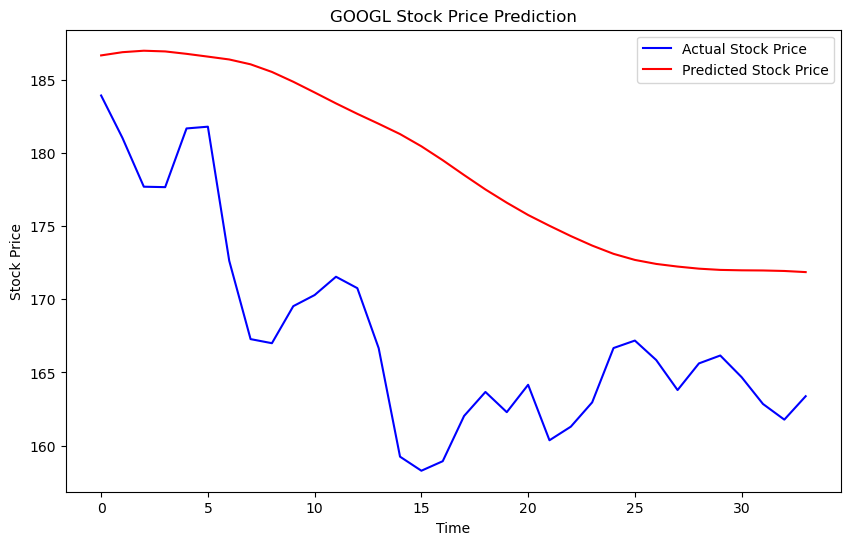

Training and predicting for NVDA...
Fetching data for NVDA...


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3820
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1219
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0268
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0776
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0225
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0159
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0269
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0253
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0182
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0140
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0123
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0148
Epoch 13/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0140
Epoch 14/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0130
Epoch 15/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0144
Epoch 16/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/

c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


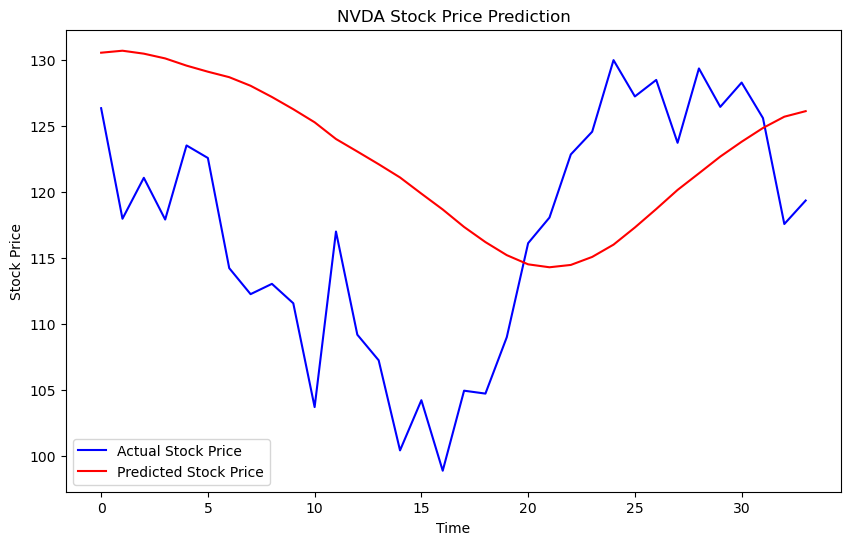

In [20]:
# Main execution loop for all companies
if __name__ == "__main__":
    companies = ['AAPL', 'MSFT', 'GOOGL', 'NVDA']  # List of companies
    for company in companies:
        print(f"Training and predicting for {company}...")
        train_and_predict_for_company(company)

Goal: The goal of this line is to preprocess your training data so that it can be used to train the LSTM model. The LSTM will learn from sequences of past stock prices to predict the future stock price.
Outcome: X_train contains the past 60-day windows of stock prices, y_train contains the next day's stock price, and the scaler is returned for later use (when predicting future prices).
The code is designed to predict the future stock price of multiple companies using an LSTM model.
It preprocesses the data by scaling it, builds and trains an LSTM model, makes predictions, and then plots the actual vs predicted stock prices.
The program is modular, so you can easily extend it to work with additional companies or modify the model architecture.

In [21]:
# Set stock symbols for the FOUR companies
companies = ['AAPL', 'MSFT', 'GOOGL', 'NVDA']

In [22]:
# Fetch stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date='2024-01-01', end_date='2024-09-01'):
    stock = yf.download(ticker, start=start_date, end=end_date)
    return stock[['Close']]  # We are only interested in the closing prices


In [23]:
# Preprocess the data for the LSTM model
def preprocess_data(stock_data, time_step=60):
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data_scaled = scaler.fit_transform(stock_data)

In [24]:
# Step 1: Fetch stock data 
stock_data = yf.download('AAPL', start='2020-01-01', end='2024-09-01')
stock_data1 = yf.download('MSFT', start='2020-01-01', end='2024-09-01')
stock_data2 = yf.download('GOOGL', start='2020-01-01', end='2024-09-01')
stock_data3 = yf.download('NVDA', start='2020-01-01', end='2024-09-01')




# This downloads stock data and selects the 'Close' column for scaling.
# If stock_data is already defined, skip this step.

stock_data = stock_data[['Close']]  # Only the 'Close' column is used for scaling
stock_data1 = stock_data[['Close']]  # Only the 'Close' column is used for scaling
stock_data2 = stock_data[['Close']]  # Only the 'Close' column is used for scaling
stock_data3 = stock_data[['Close']]  # Only the 'Close' column is used for scaling

# Step 2: Initialize the scaler to scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 4))

# Step 3: Fit the scaler to the data and transform it
stock_data_scaled = scaler.fit_transform(stock_data,stock_data1)

# Step 4: Now stock_data_scaled contains the normalized stock prices
print(stock_data_scaled)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[[0.42511649]
 [0.40877869]
 [0.42203908]
 ...
 [3.81357091]
 [3.88742608]
 [3.86974568]]


In [25]:

# Assuming stock_data is a pandas DataFrame with the stock's closing prices
stock_data = stock_data[['Close']]  # Only the 'Close' column is used for scaling

# Initialize the scaler to scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform it
stock_data_scaled = scaler.fit_transform(stock_data)

# stock_data_scaled is now a NumPy array of scaled stock prices, normalized between 0 and 1

In [26]:
time_step = 60  # Use the past 60 days of data to predict the next day's price
# Target: next day's price
# Input data: previous 60 days
# Create the dataset with a specified time window
X, y = [], []
for i in range(time_step, len(stock_data_scaled)):
    X.append(stock_data_scaled[i - time_step:i, 0])  
    y.append(stock_data_scaled[i, 0])  

X, y = np.array(X), np.array(y)

# Reshape X to be [samples, time steps, features] for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [27]:
 # Create the dataset with a specified time window
X, y = [], []
time_step = 60  # Define the time step variable

for i in range(time_step, len(stock_data_scaled)):
    # Append the last `time_step` data points for X and the next data point for y
   # X is the sequence of the previous 60 days
    # y is the next day's price


    X.append(stock_data_scaled[i - time_step:i, 0])  
    y.append(stock_data_scaled[i, 0])   

# Convert lists to NumPy arrays
X, y = np.array(X), np.array(y)

  # Reshape X to be [samples, time steps, features] for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [28]:
# Build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()

    # First LSTM layer with dropout regularization
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))


In [29]:
def build_lstm_model(input_shape):
    # Initialize the Sequential model
    model = Sequential()

In [30]:
# Plot stock price predictions vs actuals
def plot_predictions(actual, predicted, company_name):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title(f'{company_name} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


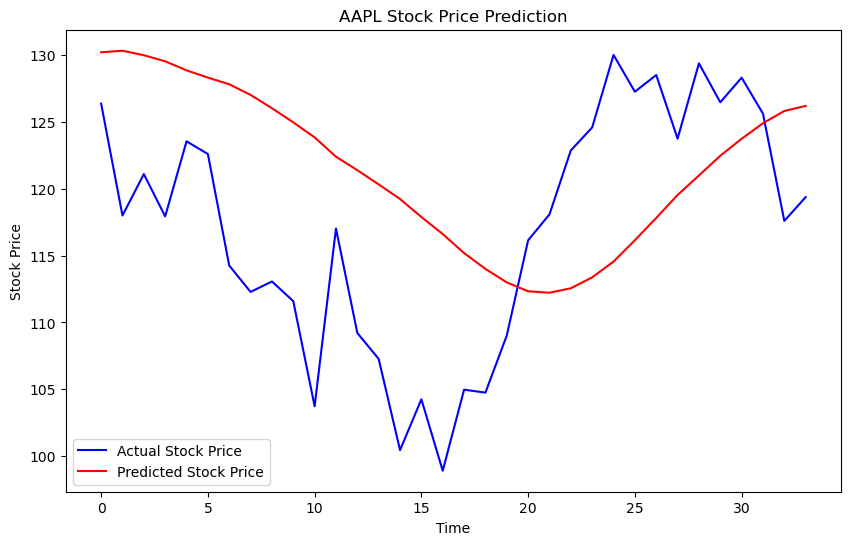

In [31]:
# Plot the results for Apple
plot_predictions(actual_stock_prices, predicted_stock_prices, 'AAPL')

In [32]:
# Train the model and make predictions for each company
def train_and_predict_for_company(ticker):
    # Fetch stock data
    stock_data = fetch_stock_data(ticker)

In [33]:
 # Split data into training and test sets (80% training, 20% testing)
training_data_len = int(len(stock_data) * 0.8)
training_data = stock_data[:training_data_len]
test_data = stock_data[training_data_len:]

In [34]:

# Split the data into training and test sets
training_data_len = int(len(stock_data) * 0.8)
training_data = stock_data[:training_data_len]

In [35]:

    # Get the actual stock prices (for plotting and comparison)
actual_stock_prices = test_data['Close'][time_step:].values

In [36]:
# Main execution loop for all companies
if __name__ == "__main__":
    for company in companies:
        print(f"Training and predicting for {company}...")
        train_and_predict_for_company(company)


    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Training and predicting for AAPL...
Training and predicting for MSFT...
Training and predicting for GOOGL...
Training and predicting for NVDA...


10 day 50 day moving average

In [37]:
# Function to calculate technical indicators (e.g., moving averages)
def add_technical_indicators(df):
    df.loc[:, '10_day_MA'] = df['Close'].rolling(window=10).mean()  # 10-day moving average
    df.loc[:, '50_day_MA'] = df['Close'].rolling(window=50).mean()  # 50-day moving average
    df.loc[:, 'Volume'] = df['Volume']  # Volume data already exists
    df = df.dropna()  # Drop rows with NaN values resulting from rolling windows
    return df

In [38]:
# Function to preprocess stock data for LSTM with multiple features
def preprocess_data(stock_data, time_step=60):
    # Normalize the data for each feature
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data_scaled = scaler.fit_transform(stock_data)

    X, y = [], []
    for i in range(time_step, len(stock_data_scaled)):
        X.append(stock_data_scaled[i - time_step:i])
        y.append(stock_data_scaled[i, 0])  # Only predict the 'Close' price

    X, y = np.array(X), np.array(y)
    return X, y, scaler

In [39]:
# Function to build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))  # Output layer for stock price prediction
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [40]:
# Function to plot the actual vs predicted stock prices
def plot_predictions(actual, predicted, company_name):
    plt.figure(figsize=(10, 6))
    plt.plot(actual, color='blue', label='Actual Stock Price')
    plt.plot(predicted, color='red', label='Predicted Stock Price')
    plt.title(f'{company_name} Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


In [41]:
# Function to train the model and predict for a given company
def train_and_predict_for_company(company):
    print(f"Fetching data and training model for {company}...")

    # Fetch stock data using yfinance
    stock_data = yf.download(company, start='2015-01-01', end='2023-01-01')
    stock_data = stock_data[['Close', 'Volume']]  # Include 'Close' and 'Volume'

    # Add technical indicators (e.g., moving averages)
    stock_data = add_technical_indicators(stock_data)

    # Split data into training and testing (80% training, 20% testing)
    training_data_len = int(len(stock_data) * 0.8)
    training_data = stock_data[:training_data_len]
    testing_data = stock_data[training_data_len:]


In [42]:
# Preprocess training data
time_step = 60
X_train, y_train, scaler = preprocess_data(training_data, time_step)

    

In [43]:
# Build the LSTM model
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_step, num_features)
model = build_lstm_model(input_shape)

c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2010
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0084
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0069
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0059
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0053
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0059
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0053
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0050
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0043
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0043
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0047
Epoch 12/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0042
Epoch 13/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0045
Epoch 14/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0043
Epoch 15/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0044
Epoc

In [45]:
# Preprocess test data
total_data = pd.concat((training_data, testing_data), axis=0)
test_inputs = total_data[len(total_data) - len(testing_data) - time_step:].values
test_inputs_scaled = scaler.transform(test_inputs)

X_test = []
for i in range(time_step, len(test_inputs_scaled)):
        X_test.append(test_inputs_scaled[i - time_step:i])
X_test = np.array(X_test)


c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [46]:
# Predict the stock prices
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices)[:, 0]  # Only reverse the scaling for 'Close'


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step


In [47]:
  # Get actual stock prices for comparison
actual_stock_prices = testing_data['Close'].values

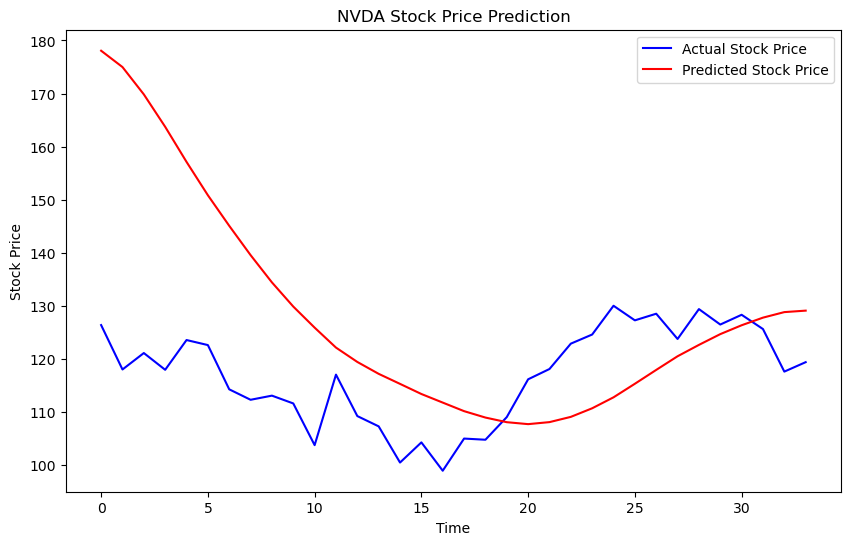

In [48]:
 # Plot the results
plot_predictions(actual_stock_prices, predicted_stock_prices, company)

This code adds technical indicators to stock data:

It computes the 10-day and 50-day moving averages to capture short-term and long-term price trends.
The stock volume is retained as a feature.
The code ensures safe modifications by working on a copy of the DataFrame and removes rows with missing values after the rolling calculations.
The function enhances stock data for use in further analysis or machine learning models, such as predicting future stock prices.

In [49]:
# Function to calculate technical indicators (e.g., moving averages)
def add_technical_indicators(df):
    # Make a copy of the DataFrame to avoid the SettingWithCopyWarning
    df = df.copy()
    
    # Add 10-day moving average
    df['10_day_MA'] = df['Close'].rolling(window=10).mean()

    # Add 50-day moving average
    df['50_day_MA'] = df['Close'].rolling(window=50).mean()

    # Add volume (no modification needed, just referencing existing data)
    df['Volume'] = df['Volume']

    # Drop rows with NaN values created by rolling windows
    df = df.dropna()

    return df

In [50]:
# Main execution loop
if __name__ == "__main__":
    companies = ['AAPL', 'MSFT', 'GOOGL']  # List of companies
    for company in companies:
        print(f"Training and predicting for {company}...")
        train_and_predict_for_company(company)

Training and predicting for AAPL...
Fetching data and training model for AAPL...


[*********************100%***********************]  1 of 1 completed


Training and predicting for MSFT...
Fetching data and training model for MSFT...


[*********************100%***********************]  1 of 1 completed


Training and predicting for GOOGL...
Fetching data and training model for GOOGL...


[*********************100%***********************]  1 of 1 completed


Summary: What the LSTM Model is Doing
This Long Short-Term Memory (LSTM) model is designed to predict stock prices based on historical data (like the past closing prices, volume, and moving averages). It uses deep learning to analyze sequences of stock prices and learn temporal patterns over time.

Key Steps the Model Performs:
Data Collection:

The model fetches historical stock data using the yfinance API, retrieving features like closing prices and volume.
It calculates technical indicators such as moving averages to help the model understand trends over different time periods (e.g., 10-day and 50-day moving averages).
Data Preprocessing:

The data is scaled using MinMaxScaler so that all input features are normalized between 0 and 1. This helps the model learn more efficiently.
The historical stock data is then broken into sequences of a fixed length (e.g., the last 60 days) to predict the next day’s price. These sequences serve as input for the LSTM model.
Model Training:

The LSTM (Long Short-Term Memory) network is a type of recurrent neural network (RNN) that is well-suited to handle time series data because it can learn patterns over time.
The LSTM model takes the input sequences (e.g., the previous 60 days of data) and predicts the next day's stock price. It learns patterns in the data by adjusting its weights during training.
The model is trained using Mean Squared Error (MSE) as the loss function and Mean Absolute Error (MAE) as an additional evaluation metric.
The model is trained for a specified number of epochs (iterations over the data), where it refines its ability to predict based on the training data.
Validation:

The model is validated against a separate test dataset (X_test and y_test). This validation data helps monitor the model's performance on unseen data, preventing overfitting.
Prediction:

After training, the model uses the learned patterns to predict stock prices for the test data (future days).
The predicted values are inverse-transformed back to the original scale (stock prices) using the previously saved MinMaxScaler.
Evaluation:

The model's performance is evaluated by comparing the predicted stock prices with the actual stock prices.
The error is tracked using metrics like MSE (to measure how far off the predictions are) and MAE (to track the average magnitude of errors).
Visualization:








The model’s predictions are visualized by plotting the actual vs. predicted stock prices over time. This helps in understanding how well the model is capturing the trends and patterns in the data.
What the Model is Learning:
Temporal Patterns: The LSTM model is learning temporal dependencies in stock prices, such as patterns in how prices change based on historical data.
Feature Relationships: By incorporating additional features like volume and moving averages, the model can also learn how these factors influence price movements.
Summary of Functionality:
Input: 60 days of historical stock data (e.g., close price, volume, technical indicators).
Output: Prediction of the next day's closing price.
Learning: The model learns temporal relationships from the data over time using LSTM cells.
Evaluation: It validates its predictions using unseen test data and provides metrics like MAE and MSE.
Visualization: It plots actual vs predicted prices to visually assess its performance.
Example Output:
The model will output a graph where:

Blue Line: Actual stock prices over time.
Red Line: Predicted stock prices by the model. The closer these lines match, the better the model's performance.
Conclusion:
The LSTM model is designed to learn from sequential data like stock prices over time, making it well-suited for predicting future prices based on historical trends

The LSTM model is used to predict future stock prices based on historical data such as closing prices, volume, and technical indicators (like moving averages). It works by learning patterns in sequences of past stock data (e.g., the last 60 days) and using that information to predict the next day's price.

The model is trained using Mean Squared Error (MSE) and validated on test data to ensure it performs well on unseen data. It then generates predictions, which are compared to actual stock prices, and the results are visualized through a plot of actual vs. predicted prices.

In Summary:
Input: Past stock data (closing prices, volume, etc.).
Output: Predicted future stock prices.
Learning: Temporal patterns in stock prices using LSTM.
Evaluation: Mean Absolute Error (MAE) and Mean Squared Error (MSE) on test data.
Visualization: Actual vs. predicted prices plotted to assess performance.

In [51]:
# Preprocess the test data for X_test and y_test
X_test = []
y_test = []
for i in range(time_step, len(test_inputs_scaled)):
    X_test.append(test_inputs_scaled[i - time_step:i])
    y_test.append(test_inputs_scaled[i, 0])  # Predict the 'Close' price

X_test = np.array(X_test)
y_test = np.array(y_test)

In [52]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Fit the model with training and validation data
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0083 - mae: 0.0693 - val_loss: 0.0286 - val_mae: 0.1274
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0045 - mae: 0.0512 - val_loss: 0.0214 - val_mae: 0.1083
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0035 - mae: 0.0460 - val_loss: 0.0209 - val_mae: 0.1053
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0032 - mae: 0.0432 - val_loss: 0.0151 - val_mae: 0.0905
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0043 - mae: 0.0490 - val_loss: 0.0183 - val_mae: 0.0969
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0035 - mae: 0.0465 - val_loss: 0.0149 - val_mae: 0.0870
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0033 - mae: 0.0447 - val_loss: 0.0188 - val_mae: 0.0978
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0031 - mae: 0.0432 - val_loss: 0.0127 - val_mae: 0.0793
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.003

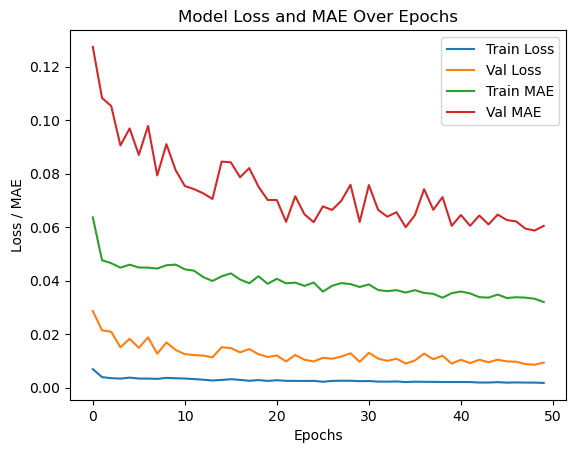

In [53]:
import matplotlib.pyplot as plt

# Plot training & validation loss and MAE over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model Loss and MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss / MAE')
plt.legend()
plt.show()

In [1]:

import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

In [1]:
# Import the Hugging Face pipeline for sentiment analysis
from transformers import pipeline


In [4]:
# Initialize the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Nat\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [5]:
# Example texts to analyze sentiment
texts = [
    "The stock market is performing really well today!",
    "I'm very disappointed with the company's financial results.",
    "The product launch was a huge success!",
    "Investors are worried about the economic outlook."
]

In [6]:

# Perform sentiment analysis on the texts
results = sentiment_analysis(texts)


In [7]:
# Print out the results
for i, text in enumerate(texts):
    print(f"Text: {text}")
    print(f"Sentiment: {results[i]['label']}, Score: {results[i]['score']:.4f}")
    print("----------------------------------------------------")

Text: The stock market is performing really well today!
Sentiment: POSITIVE, Score: 0.9998
----------------------------------------------------
Text: I'm very disappointed with the company's financial results.
Sentiment: NEGATIVE, Score: 0.9998
----------------------------------------------------
Text: The product launch was a huge success!
Sentiment: POSITIVE, Score: 0.9999
----------------------------------------------------
Text: Investors are worried about the economic outlook.
Sentiment: NEGATIVE, Score: 0.9925
----------------------------------------------------


In [1]:
import yfinance as yf
from transformers import pipeline

In [2]:

# Initialize the sentiment analysis pipeline from Hugging Face
sentiment_analysis = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:

# Function to fetch recent stock-related news using yfinance
def fetch_stock_news(stock_symbol, num_articles=5):
    stock = yf.TTicker(stock_symbol)
    news = stock.news  # Get stock news
    
    if not news:
        return []  # Return an empty list if no news is available
    
    # Extract top `num_articles` news articles
    news_headlines = [article['title'] for article in news[:num_articles]]
    return news_headlines

In [4]:
# Perform sentiment analysis on stock news headlines
def analyze_sentiment_on_news(stock_symbol, num_articles=5):
    # Fetch stock news
    headlines = fetch_stock_news(stock_symbol, num_articles)
    
    # Check if headlines are available
    if not headlines:
        print(f"No news found for {stock_symbol}")
        return
    
    print(f"News headlines for {stock_symbol}:\n")
    
    # Perform sentiment analysis on each headline
    results = sentiment_analysis(headlines)
    
    # Print results
    for i, headline in enumerate(headlines):
        sentiment = results[i]['label']
        score = results[i]['score']
        print(f"Headline: {headline}")
        print(f"Sentiment: {sentiment}, Score: {score:.4f}")
        print("----------------------------------------------------")


In [5]:
 # Example: Analyze sentiment on Apple (AAPL) stock news
stock_symbol = "AAPL"
analyze_sentiment_on_news(stock_symbol, num_articles=5)

AttributeError: module 'yfinance' has no attribute 'TTicker'